# CREDIT CARD FRAUD DETECTION:

The dataset contains transactions made by credit cards in September 2013 by european cardholders.
This project aims to identify and classify transactions as 'Fraud' or 'Not Fraud' based on the underlying patterns in the already labeled data.
Since this is a Classification task, we will employ various Supervised Learning models and identify the most appropriate model to avoid missclassifications, and base our results on a set of metrics appropriate to the problem.

# Loading the Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

The target variable here, is the 'Class' which is 1(fraud) and 0(non-fraud). Each of the other 30 features are numerical values which already have been transformed by PCA.

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


With the dataset description, we know that all the features, except 'Time' and 'Amount' have been obtained by applying Principal Component Analysis(PCA). So, we will scale 'Time' and 'Amount' in order to make it comparable to all the other features.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc1=StandardScaler()
sc2=StandardScaler()
data['Time']=sc1.fit_transform(data['Time'].values.reshape(-1,1))
data['Amount']=sc2.fit_transform(data['Amount'].values.reshape(-1,1))

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# Target Distribution:

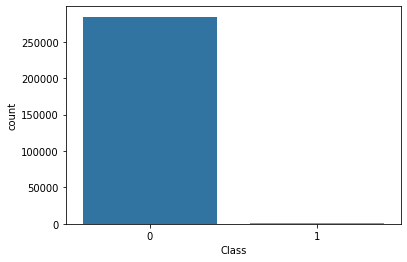

In [6]:
sns.countplot(data['Class'])

We can observe that a majority of the target classes are 0(not fraud). This scenario is understandable, but will lead to biased models, and generalization errors.

In [7]:
notfraud=data['Class'].value_counts()[0]
fraud=data['Class'].value_counts()[1]
print('Number of fraud cases: {}, or {}'.format(fraud,fraud/len(data)))
print('Number of non-fraud cases: {}, or {}'.format(notfraud,notfraud/len(data)))

Number of fraud cases: 492, or 0.001727485630620034
Number of non-fraud cases: 284315, or 0.9982725143693799


We can randomly undersample the majority class in order to bring about an equal distribution of output classes.

In [8]:
fraud=data[data['Class']==1]
n=len(fraud)
print(n)

492


In [9]:
notfraud=data.sample(n)

In [10]:
notfraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203317,0.841267,-2.154199,-0.894634,0.523031,-0.189810,-0.566341,-0.911441,-2.053222,0.195034,1.025487,...,0.997097,0.326514,-0.615063,0.082835,-0.732747,0.517286,0.039144,-0.711084,-0.265271,0
30083,-1.243425,1.044659,0.520513,1.239857,3.843052,-0.190651,0.626763,-0.239013,0.290302,-0.659007,...,-0.343745,-0.970600,0.208006,-0.007493,0.115130,-0.248479,0.023670,0.030260,-0.310010,0
50338,-1.060516,1.395345,-0.469220,-0.402680,-1.099353,0.022515,0.155618,-0.327600,0.023867,-1.259707,...,-0.191817,-0.722104,-0.012193,-1.179519,0.394041,-0.446591,-0.008042,-0.008430,-0.241283,0
84302,-0.727927,-1.956627,1.898686,0.203936,1.045007,0.333954,1.843221,-0.600369,1.881435,-1.695306,...,0.328318,0.430643,0.187275,-1.394471,-0.351377,-0.182428,-0.677956,-0.188702,-0.273468,0
248935,1.249770,-0.354477,-0.063543,1.265357,0.820765,0.765257,1.909953,-0.624843,0.640395,-0.265814,...,0.423757,1.451528,-0.109374,-1.523181,-0.724873,1.151471,0.221593,0.153980,-0.253317,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94930,-0.625860,-0.584659,1.242573,1.537891,0.327089,0.090248,-0.817076,0.866812,-0.354876,-0.242605,...,-0.261302,-0.580722,-0.057804,0.338616,-0.378128,0.115956,-0.099313,-0.033789,-0.331760,0
281393,1.586444,2.014407,0.135825,-1.597656,0.343537,0.417738,-0.652515,0.118940,-0.126418,0.156412,...,-0.294174,-0.763977,0.343186,0.681637,-0.299664,0.140876,-0.063945,-0.037376,-0.336198,0
112350,-0.467357,-0.122266,0.287384,1.418924,0.241924,0.047267,-0.799678,0.565284,-0.459134,-1.688336,...,-0.202297,0.083153,-0.018045,0.386806,-0.481513,-0.391473,0.048538,-0.029982,-0.259074,0
132161,-0.314497,1.203222,0.754496,0.254990,2.565147,0.036107,-1.035628,0.572933,-0.302627,-1.070027,...,0.006844,-0.006901,-0.065048,0.709158,0.683982,0.048536,-0.039854,0.013501,-0.334958,0


In [11]:
totaldata=pd.concat([fraud,notfraud]).reset_index(drop=True)
totaldata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.988034,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
1,-1.986644,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
2,-1.902623,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
3,-1.849472,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
4,-1.838248,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [12]:
shuffledata=totaldata.sample(frac=1).reset_index(drop=True)

In [13]:
shuffledata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.831848,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,...,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,-0.349911,1
1,-0.593451,0.902312,-1.455317,0.407464,0.896914,-0.876105,1.471401,-0.831700,0.405943,0.539725,...,-0.768936,-1.800304,-0.161551,-1.415246,0.368576,-0.436017,0.066273,0.050151,0.488368,0
2,-1.819381,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,-0.349231,1
3,-1.240625,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,-0.349231,1
4,-1.128912,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,-0.232247,1


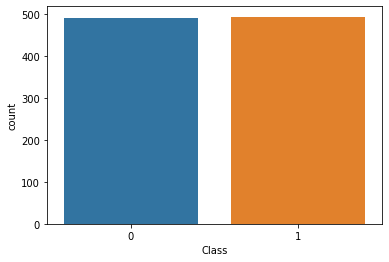

In [14]:
sns.countplot(shuffledata['Class'])

# Correlation Heatmap:

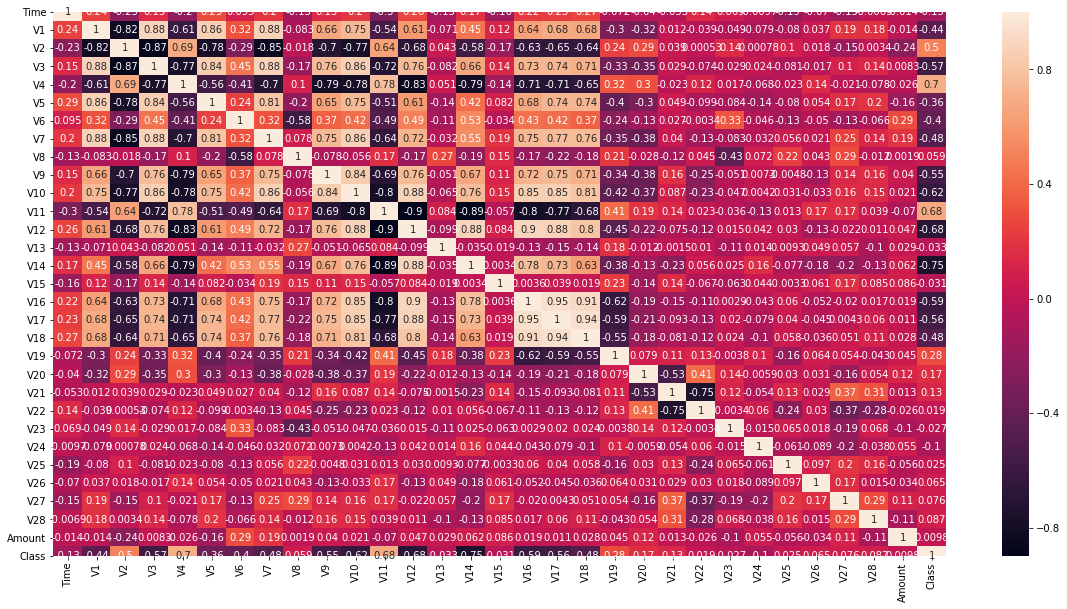

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(shuffledata.corr(),annot=True)

Since all the 'V' features already have been obtained by PCA, it makes sense that only some will explain the variance in the target feature.

In [16]:
shuffledata.corr()['Class'].nlargest(10)

Class    1.000000
V4       0.699681
V11      0.679072
V2       0.502754
V19      0.282495
V20      0.166435
V21      0.125812
V28      0.086627
V27      0.075565
V26      0.064963
Name: Class, dtype: float64

In [17]:
shuffledata.corr()['Class'].nsmallest(10)

V14   -0.751697
V12   -0.684216
V10   -0.623099
V16   -0.589348
V3    -0.571746
V17   -0.556175
V9    -0.548794
V7    -0.481505
V18   -0.476563
V1    -0.443470
Name: Class, dtype: float64

Text(0.5, 1.0, 'V2')

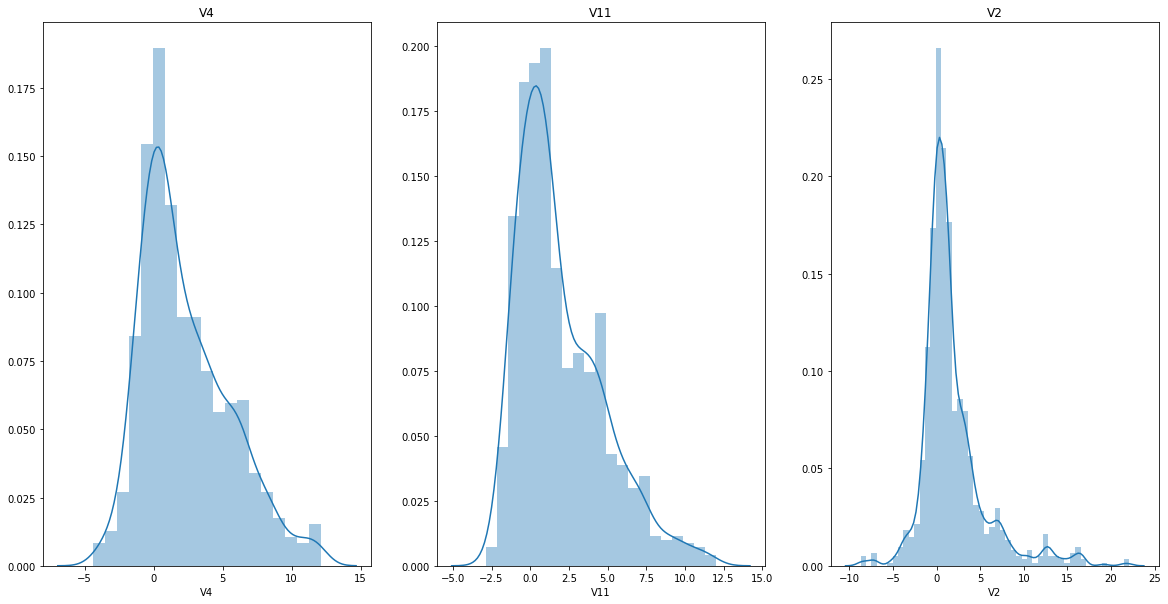

In [18]:
highcorr=['V4','V11','V2']
lowcorr=['V14','V12','V10','V16','V3','V17','V9']
fig,ax=plt.subplots(ncols=3,figsize=(20,10))
sns.distplot(shuffledata['V4'],ax=ax[0])
sns.distplot(shuffledata['V11'],ax=ax[1])
sns.distplot(shuffledata['V2'],ax=ax[2])
ax[0].set_title('V4')
ax[1].set_title('V11')
ax[2].set_title('V2')

To improve upon the performance of these highly correlated features, we would want to remove its outliers.

Text(0.5, 1.0, 'V2')

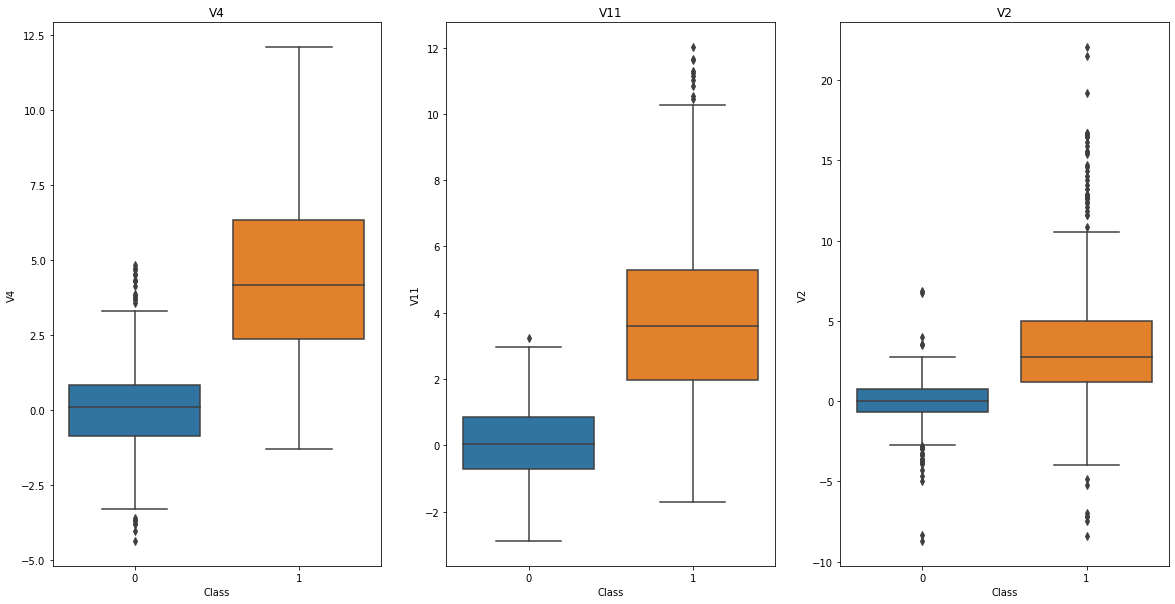

In [19]:
fig,ax=plt.subplots(ncols=3,figsize=(20,10))
sns.boxplot(shuffledata['Class'],shuffledata['V4'],ax=ax[0])
sns.boxplot(shuffledata['Class'],shuffledata['V11'],ax=ax[1])
sns.boxplot(shuffledata['Class'],shuffledata['V2'],ax=ax[2])
ax[0].set_title('V4')
ax[1].set_title('V11')
ax[2].set_title('V2')

In [20]:
copy=shuffledata.copy()
len(shuffledata)

984

In [21]:
q1=shuffledata.quantile(0.25)
q2=shuffledata.quantile(0.75)
iqr=q2-q1

In [22]:
copy=shuffledata[~((shuffledata<q1-2.5*iqr)|(shuffledata>q2+2.5*iqr)).any(axis=1)]

In [23]:
copy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.831848,-6.159607,1.468713,-6.850888,5.174706,-2.986704,-1.795054,-6.545072,2.621236,-3.605870,...,1.061314,0.125737,0.589592,-0.568731,0.582825,-0.042583,0.951130,0.158996,-0.349911,1
1,-0.593451,0.902312,-1.455317,0.407464,0.896914,-0.876105,1.471401,-0.831700,0.405943,0.539725,...,-0.768936,-1.800304,-0.161551,-1.415246,0.368576,-0.436017,0.066273,0.050151,0.488368,0
2,-1.819381,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,-0.349231,1
3,-1.240625,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,-0.349231,1
5,-0.860003,1.469180,-1.136452,0.702474,-1.505421,-1.614489,-0.290405,-1.342467,0.013798,-1.862155,...,-0.025325,0.305883,-0.061180,-0.004833,0.359169,-0.101122,0.047992,0.014995,-0.283663,0


In [24]:
len(copy)

685

In [25]:
X=copy.drop('Class',axis=1)
y=copy['Class']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

# Modeling:

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

Training on ML models:

In [28]:
model1=LogisticRegression()
print(cross_val_score(model1,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.976045112781955


In [29]:
model2=SVC()
print(cross_val_score(model2,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.9791954887218045


In [30]:
model3=DecisionTreeClassifier()
print(cross_val_score(model3,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.8934962406015037


In [31]:
model4=RandomForestClassifier()
print(cross_val_score(model4,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.9722255639097744


In [32]:
model5=GradientBoostingClassifier()
print(cross_val_score(model5,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.9769473684210525


In [33]:
model6=KNeighborsClassifier()
print(cross_val_score(model6,X_train,y_train,cv=10,scoring='roc_auc').mean())

0.964406015037594


In [34]:
model7=MLPClassifier()
print(cross_val_score(model7,X_train,y_train,cv=10,scoring='roc_auc').mean())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

0.9769172932330827


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
model=RandomForestClassifier(random_state=12)
min_samples_leaf=[1,5,10,15,20]
max_depth=[1,5,10,15,20]
max_features=[1,5,10,15,20]
param_dist=dict(min_samples_leaf=min_samples_leaf,max_depth=max_depth,max_features=max_features)

In [36]:
rand=RandomizedSearchCV(model,param_distributions=param_dist,cv=10,n_iter=10,random_state=12,scoring='roc_auc')
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=12),
                   param_distributions={'max_depth': [1, 5, 10, 15, 20],
                                        'max_features': [1, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10, 15, 20]},
                   random_state=12, scoring='roc_auc')

In [37]:
rand.best_params_

{'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 20}

In [38]:
rand.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, random_state=12)

In [39]:
rand.best_score_

0.9751390977443609

In [40]:
m=RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=15,
                       random_state=12)
m.fit(X_train,y_train)
preds=m.predict(X_test)
print(accuracy_score(y_test,preds))

0.9197080291970803


In [41]:
confusion_matrix(y_test,preds)

array([[79,  2],
       [ 9, 47]])

# ROC-AUC Curves:

In [42]:
def plot_curve(logfpr,logtpr,rffpr,rftpr,gbfpr,gbtpr):
    plt.figure(figsize=(10,8))
    plt.plot(logfpr,logtpr,label='Linear Regression',color='green')
    plt.plot(rffpr,rftpr,label='Random Forest',color='black')
    plt.plot(gbfpr,gbtpr,label='Gradient Boosting',color='yellow')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.legend()

In [43]:
model1.fit(X_train,y_train)
logfpr,logtpr,t1=roc_curve(y_test,model1.predict_proba(X_test)[:,1].reshape(-1,1))
model4.fit(X_train,y_train)
rffpr,rftpr,t2=roc_curve(y_test,model4.predict_proba(X_test)[:,1].reshape(-1,1))
model5.fit(X_train,y_train)
gbfpr,gbtpr,t3=roc_curve(y_test,model5.predict_proba(X_test)[:,1].reshape(-1,1))

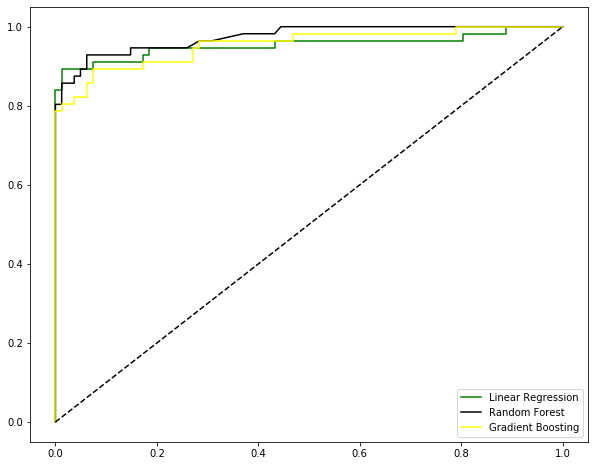

In [44]:
plot_curve(logfpr,logtpr,rffpr,rftpr,gbfpr,gbtpr)

In [45]:
opt=GradientBoostingClassifier(random_state=23)
learning_rate=[0.001,0.01,0.1,1,10]
min_samples_leaf=[1,5,10,20]
max_depth=[1,2,4,5,10,20]
max_features=[1,5,10,15,20]
param_dist=dict(learning_rate=learning_rate,min_samples_leaf=min_samples_leaf,max_depth=max_depth,max_features=max_features)
rand1=RandomizedSearchCV(opt,param_distributions=param_dist,cv=10,scoring='roc_auc',random_state=23)
rand1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=23),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'max_depth': [1, 2, 4, 5, 10, 20],
                                        'max_features': [1, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 5, 10, 20]},
                   random_state=23, scoring='roc_auc')

In [46]:
rand1.best_params_

{'min_samples_leaf': 10,
 'max_features': 10,
 'max_depth': 1,
 'learning_rate': 0.1}

In [47]:
rand1.best_score_

0.9799699248120302

In [57]:
rand1.best_estimator_

GradientBoostingClassifier(max_depth=1, max_features=10, min_samples_leaf=10,
                           random_state=23)

In [66]:
pr=rand1.predict(X_test)
print(confusion_matrix(y_test,pr))
print(accuracy_score(y_test,pr))

[[79  2]
 [ 7 49]]
0.9343065693430657


Changing thresholds to see effect on predictions

In [60]:
gb=GradientBoostingClassifier(max_depth=1, max_features=10, min_samples_leaf=10,
                           random_state=23)
gb.fit(X_train,y_train)
y_pred_undersample_proba = gb.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    print('Threshold>= '+str(i))
    print(confusion_matrix(y_test,y_test_predictions_high_recall))
    
    
    # Compute confusion matrix
    #cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)

Threshold>= 0.1
[[62 19]
 [ 3 53]]
Threshold>= 0.2
[[71 10]
 [ 5 51]]
Threshold>= 0.3
[[75  6]
 [ 5 51]]
Threshold>= 0.4
[[77  4]
 [ 7 49]]
Threshold>= 0.5
[[79  2]
 [ 7 49]]
Threshold>= 0.6
[[79  2]
 [ 7 49]]
Threshold>= 0.7
[[80  1]
 [ 9 47]]
Threshold>= 0.8
[[80  1]
 [10 46]]
Threshold>= 0.9
[[80  1]
 [10 46]]


Since we want to correctly identify credit card faults, we tend to favour more number of False Positives than False Negatives, so in a sense, we try to minimize Precision and maximize Recall. And as we see in the above box, lowering our threshold gives us a higher Recall Score.

Precision-Recall Curves for different thresholds:

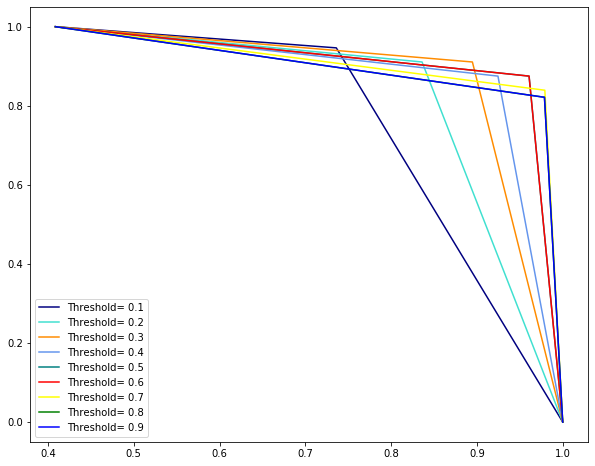

In [65]:
plt.figure(figsize=(10,8))
from sklearn.metrics import precision_recall_curve
thresholds=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
color=['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue']
gb.fit(X_train,y_train)
y_probs=gb.predict_proba(X_test)[:,1]
for i,j in zip(thresholds,color):
    tprob=y_probs>i
    p,r,t=precision_recall_curve(y_test,tprob)
    plt.plot(p,r,color=j,label='Threshold= '+str(i))
    plt.legend()

We wish to identify a threshold where there is a subtle balance between Precision and Recall. This is offered by the threshold 0.1 or even 0.2.